## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. Its primary purpose is to transform a dataset with a large number of features into a dataset with fewer features, while retaining as much of the original variance (information) as possible.

The core idea behind PCA is to find a new set of uncorrelated variables, called principal components, which are linear combinations of the original variables. These principal components are ordered such that the first component captures the largest possible variance in the data, the second component captures the next largest variance, and so on, subject to being orthogonal to the preceding components. By selecting a subset of these principal components, typically the first few that account for a significant portion of the total variance, we can reduce the dimensionality of the dataset.

Dimensionality reduction is important for several reasons:
- **Reducing noise:** By focusing on the components with the most variance, we can effectively filter out noise present in less important dimensions.
- **Improving model performance:** Many machine learning algorithms perform better with fewer features, especially when features are highly correlated.
- **Easing visualization:** Reducing data to two or three dimensions makes it possible to visualize complex datasets.
- **Reducing computational cost:** Working with fewer features requires less memory and processing power.

## Dataset

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset which has 13 features
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Display the first few rows and the shape of the DataFrame
display(wine_df.head())
display(wine_df.shape)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(178, 13)

## Preprocess the data

## Data Preprocessing: Scaling

Before applying PCA, it is crucial to scale the data. PCA is sensitive to the scale of the features because it is based on the variance of the data. Features with larger scales will dominate the principal components, potentially leading to misleading results.

For example, if one feature is measured in meters and another in kilometers, the feature in meters will have much larger numerical values and thus a much larger variance than the feature in kilometers, even if they represent the same underlying characteristic. Without scaling, PCA would give more importance to the feature in meters simply due to its larger scale.

Scaling ensures that all features contribute equally to the principal components, regardless of their original units or magnitudes. Common scaling techniques include standardization (subtracting the mean and dividing by the standard deviation) and normalization (scaling features to a specific range, usually between 0 and 1). Standardization is often preferred for PCA as it centers the data around zero with a unit variance.

In [2]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the wine_df DataFrame and transform the data
scaled_wine_data = scaler.fit_transform(wine_df)

# Display the first few rows of the scaled_wine_data
display(scaled_wine_data[:5])

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

## Apply PCA

In [3]:
from sklearn.decomposition import PCA
import numpy as np

# Instantiate PCA without specifying the number of components
pca_full = PCA()

# Fit PCA to the scaled data
pca_full.fit(scaled_wine_data)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Determine the number of components to explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of components to explain 95% variance: {n_components_95}")

# Instantiate PCA with the determined number of components
pca_final = PCA(n_components=n_components_95)

# Fit and transform the scaled data
pca_result = pca_final.fit_transform(scaled_wine_data)

# Display the shape of the transformed data
display(pca_result.shape)

Number of components to explain 95% variance: 10


(178, 10)

## Visualize results

**Reasoning**:
Create a scatter plot of the first two principal components, colored by the original wine species, with appropriate labels, title, and legend, to visualize the dimensionality reduction.



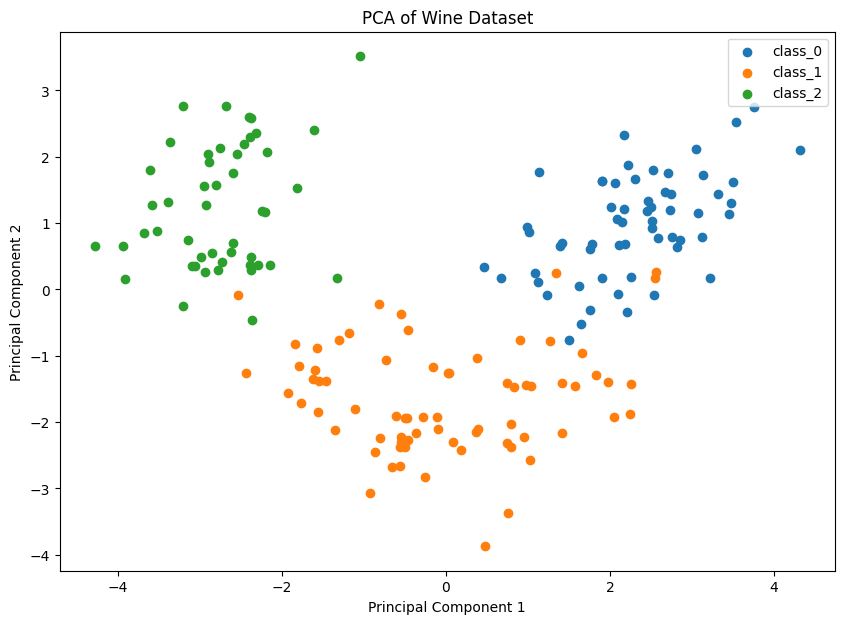

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get the target names (species)
target_names = wine.target_names

# Create a scatter plot
plt.figure(figsize=(10, 7))

# Plot each species separately
for i, target_name in zip([0, 1, 2], target_names):
    plt.scatter(pca_result[wine.target == i, 0],
                pca_result[wine.target == i, 1],
                label=target_name)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Discuss and interpret the components

### Subtask:
Explain the interpretation of the principal components and the explained variance.


**Reasoning**:
Create a markdown cell to discuss the interpretation of the principal components and explained variance as requested by the subtask.



In [12]:
%%markdown
## Interpreting Principal Components and Explained Variance

The principal components obtained from PCA are new variables that are linear combinations of the original features. Each principal component can be expressed as:

$PC_i = w_{i1}X_1 + w_{i2}X_2 + ... + w_{ip}X_p$

where $PC_i$ is the i-th principal component, $X_j$ is the j-th original feature, and $w_{ij}$ are the weights or loadings. These loadings represent the contribution of each original feature to the principal component. By examining the magnitude and sign of these loadings, we can understand which original features are most influential in defining each principal component. For instance, if a principal component has large positive loadings for 'alcohol' and 'malic_acid', it suggests that this component captures variations related to higher alcohol content and higher malic acid.

The **explained variance ratio** for each principal component indicates the proportion of the total variance in the dataset that is captured by that component. The principal components are ordered by the amount of variance they explain, with the first principal component explaining the largest amount of variance, the second explaining the second largest, and so on.

The **cumulative explained variance** is the sum of the explained variance ratios of the first $k$ principal components. It tells us the total proportion of variance in the original data that is retained when we reduce the dimensionality to $k$ components. In the previous step, we calculated that **10 components** are needed to explain approximately **95%** of the variance in the wine dataset. This means that by using these 10 principal components instead of the original 13 features, we retain most of the important information (variance) in the dataset while reducing its dimensionality.

Looking back at the explained variance ratio for each component (which can be accessed from the `explained_variance_ratio_` attribute of the fitted PCA object `pca_full`), we can see how the variance is distributed across the components. The first few principal components typically capture the most significant patterns and variations in the data. For the wine dataset, the first principal component likely captures the most dominant characteristics that differentiate the wine classes, as it explains the largest portion of the variance. Subsequent components capture progressively less variance but still contribute to explaining the overall structure of the data. Analyzing the loadings for these top components would provide specific insights into which original features (e.g., alcohol, malic_acid, flavanoids) are the primary drivers of these differences.

## Interpreting Principal Components and Explained Variance

The principal components obtained from PCA are new variables that are linear combinations of the original features. Each principal component can be expressed as:

$PC_i = w_{i1}X_1 + w_{i2}X_2 + ... + w_{ip}X_p$

where $PC_i$ is the i-th principal component, $X_j$ is the j-th original feature, and $w_{ij}$ are the weights or loadings. These loadings represent the contribution of each original feature to the principal component. By examining the magnitude and sign of these loadings, we can understand which original features are most influential in defining each principal component. For instance, if a principal component has large positive loadings for 'alcohol' and 'malic_acid', it suggests that this component captures variations related to higher alcohol content and higher malic acid.

The **explained variance ratio** for each principal component indicates the proportion of the total variance in the dataset that is captured by that component. The principal components are ordered by the amount of variance they explain, with the first principal component explaining the largest amount of variance, the second explaining the second largest, and so on.

The **cumulative explained variance** is the sum of the explained variance ratios of the first $k$ principal components. It tells us the total proportion of variance in the original data that is retained when we reduce the dimensionality to $k$ components. In the previous step, we calculated that **10 components** are needed to explain approximately **95%** of the variance in the wine dataset. This means that by using these 10 principal components instead of the original 13 features, we retain most of the important information (variance) in the dataset while reducing its dimensionality.

Looking back at the explained variance ratio for each component (which can be accessed from the `explained_variance_ratio_` attribute of the fitted PCA object `pca_full`), we can see how the variance is distributed across the components. The first few principal components typically capture the most significant patterns and variations in the data. For the wine dataset, the first principal component likely captures the most dominant characteristics that differentiate the wine classes, as it explains the largest portion of the variance. Subsequent components capture progressively less variance but still contribute to explaining the overall structure of the data. Analyzing the loadings for these top components would provide specific insights into which original features (e.g., alcohol, malic_acid, flavanoids) are the primary drivers of these differences.


## Summarize pca

### Subtask:
Provide a summary of PCA and its applications.


**Reasoning**:
Create a markdown cell to provide a concise summary of PCA, its key steps, and common applications based on the instructions.



In [13]:
%%markdown
## Summary of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful **dimensionality reduction** technique. Its main goal is to transform a dataset with many variables into a dataset with fewer variables, called **principal components**, while preserving as much of the original data's variability (information) as possible. This is achieved by finding a new set of orthogonal axes that capture the directions of maximum variance in the data.

The key steps involved in performing PCA are:

1.  **Scaling the Data:** Standardizing or normalizing the features is crucial because PCA is sensitive to the scale of the variables.
2.  **Applying PCA:** The PCA algorithm is applied to the scaled data to compute the principal components and the amount of variance explained by each component.
3.  **Determining the Number of Components:** An appropriate number of principal components is selected, typically based on the cumulative explained variance (e.g., retaining components that explain a certain percentage of the total variance) or by using a scree plot.

PCA has numerous applications across various fields, including:

*   **Data Compression:** Reducing the number of features while retaining essential information.
*   **Noise Reduction:** Filtering out noise by focusing on components with high variance.
*   **Visualization:** Reducing high-dimensional data to 2 or 3 dimensions for easier plotting and visual analysis.
*   **Feature Extraction:** Creating a smaller set of uncorrelated features that can be used as input for machine learning models, potentially improving performance and reducing training time.

## Summary of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful **dimensionality reduction** technique. Its main goal is to transform a dataset with many variables into a dataset with fewer variables, called **principal components**, while preserving as much of the original data's variability (information) as possible. This is achieved by finding a new set of orthogonal axes that capture the directions of maximum variance in the data.

The key steps involved in performing PCA are:

1.  **Scaling the Data:** Standardizing or normalizing the features is crucial because PCA is sensitive to the scale of the variables.
2.  **Applying PCA:** The PCA algorithm is applied to the scaled data to compute the principal components and the amount of variance explained by each component.
3.  **Determining the Number of Components:** An appropriate number of principal components is selected, typically based on the cumulative explained variance (e.g., retaining components that explain a certain percentage of the total variance) or by using a scree plot.

PCA has numerous applications across various fields, including:

*   **Data Compression:** Reducing the number of features while retaining essential information.
*   **Noise Reduction:** Filtering out noise by focusing on components with high variance.
*   **Visualization:** Reducing high-dimensional data to 2 or 3 dimensions for easier plotting and visual analysis.
*   **Feature Extraction:** Creating a smaller set of uncorrelated features that can be used as input for machine learning models, potentially improving performance and reducing training time.


## Summary:

### Data Analysis Key Findings

*   Principal Component Analysis (PCA) was introduced as a technique for dimensionality reduction that transforms data into a new set of uncorrelated principal components while retaining maximum variance.
*   The Wine dataset, containing 13 features, was selected and loaded for demonstrating PCA.
*   Data preprocessing through standardization using `StandardScaler` was performed on the dataset to ensure features contribute equally to the principal components.
*   PCA was applied to the scaled data, and it was determined that 10 principal components are required to explain approximately 95% of the variance in the dataset.
*   The data was transformed into a reduced-dimensional space with 10 principal components.
*   A scatter plot visualizing the first two principal components of the Wine dataset was generated, showing the separation of the different wine species in the reduced 2D space.
*   The interpretation of principal components and explained variance was discussed, highlighting how loadings indicate the contribution of original features and how cumulative explained variance helps in selecting the number of components.

### Insights or Next Steps

*   The transformed data with reduced dimensionality can now be used as input for machine learning models, potentially improving performance and reducing computational cost.
*   Further analysis of the loadings of the first few principal components could provide deeper insights into which original features are the most influential in distinguishing the wine species.
